# DSCI 235 Project *(APRIL 24)*

- Marketing campain data
- Analyze the consumers
- Gain insight on each marketing campaign
- Utilis insight to optomize campaigns and consumer experience

### Agenda 
The topic of this project is analyzing the performance of a marketing campaign to identify key customer characteristics or behaviors that interact with marketing and sales. Marketing data is inherently rich and multidimensional, making it an excellent candidate for practicing data wrangling and analysis techniques. I am particularly interested in understanding how customer demographics and purchasing behavior influence campaign success, as this knowledge can directly inform marketing strategies. With this project being tallied on my portfolio I believe I will be more confident in advancing towards job positions.


### Dataset
The dataset I will use is the Marketing Campaign Data from Kaggle (https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign), which includes customer demographics, campaign engagement metrics, and purchase history. 


**Columns of Interest:** \
Customer demographics: Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome \
Campaign engagement: Response, Recency, NumDealsPurchases \
Purchase behavior: MntWines, MntFruits, NumWebPurchases, NumCatalogPurchases, etc.

### Questions to Address
Customer Segmentation:
Which customer segments (based on demographics like age, education, and income) are most likely to respond to the campaign? How does household composition (e.g., number of kids or teens) influence campaign response?

Purchase Behavior:
Which product categories (e.g., wines, fruits, meat) are most popular among customers who responded to the campaign? What is the relationship between income and total spending?

Channel Effectiveness:
Which purchase channels (web, catalog, in-store) are most effective for different customer segments? Do customers who use discounts (NumDealsPurchases) spend more overall?

Correlations/Trends: How does the length of time since the last purchase (Recency) correlate with campaign response? Age distributions

### Reporting
Answer the proposed questions and provide actionable recommendations (for businesses)
Export final results to a CSV file. Include raw version in github


### Import libraries and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
data = pd.read_csv('archive/marketing_campaign.csv', sep=';')

### Explore the dataset

In [72]:
data.shape

(2240, 27)

In [12]:
data.info()  # for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data = data.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [73]:
data.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0


## Overview of Customers

In [77]:
data['Marital_Status'].unique() # Marital status groups

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [78]:
data['Education'].unique() # Education level groups

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [20]:
# Year birth to Age
data['Year_Birth'] = 2025 - data['Year_Birth']
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,68,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,71,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,60,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,41,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,44,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,58,Master,Together,62513.0,0,1,2013-09-09,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,54,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,40,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,51,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,75,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,20,1,0,0,0,0,0,0


In [24]:
data = data.rename(columns={'Year_Birth':'Age'}) # rename column

In [27]:
#missing values
data.isna().sum() #24 missing income values

ID                     0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [32]:
data['Income'] = data['Income'].fillna(data['Income'].median()) # impute using median income

# other imputations include mode or mean
# We can also use more computational methods like K-nn or regression to impute

## Synthesis
...\
...\
...

In [ ]:
# Age groups

In [34]:
# Total spending column
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_cols].sum(axis=1)

In [ ]:
# Create 2 seperate subset dataframes then create insightful columns for each subject 
# one for consumer activity
# another for consumer characteristics

In [36]:
# household size feature
data['Household_Size'] = 1 + data['Kidhome'] + data['Teenhome'] + (data['Marital_Status'].isin(['Married', 'Together'])).astype(int)

In [37]:
data

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Household_Size
0,5524,68,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,1617,1
1,2174,71,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,27,3
2,4141,60,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,776,2
3,6182,41,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,53,3
4,5324,44,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,422,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,58,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,0,1341,3
2236,4001,79,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,0,444,5
2237,7270,44,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,0,1241,1
2238,8235,69,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,0,843,3


## Statistical Analysis

In [ ]:

### 1. Customer Segmentation Analysis

# Age group analysis
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 100], 
                          labels=['<30', '30-40', '40-50', '50-60', '60+'])
response_by_age = data.groupby('Age_Group')['Response'].mean()
print("\nResponse Rate by Age Group:")
print(response_by_age)

# Education level analysis
response_by_edu = data.groupby('Education')['Response'].mean().sort_values(ascending=False)
print("\nResponse Rate by Education Level:")
print(response_by_edu)

# Income quartiles analysis
data['Income_Quartile'] = pd.qcut(data['Income'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
response_by_income = data.groupby('Income_Quartile')['Response'].mean()
print("\nResponse Rate by Income Quartile:")
print(response_by_income)

# Statistical test for household composition
from scipy.stats import ttest_ind
has_kids = data[data['Kidhome'] > 0]['Response']
no_kids = data[data['Kidhome'] == 0]['Response']
t_stat, p_value = ttest_ind(has_kids, no_kids)
print(f"\nT-test for Response rate (Kids vs No Kids): t={t_stat:.3f}, p={p_value:.3f}")


### 2. Purchase Behavior Analysis

# Product category preferences among responders
responders = data[data['Response'] == 1]
product_means = responders[spending_cols].mean().sort_values(ascending=False)
print("\nAverage Spending by Product Category (Responders):")
print(product_means)

# Correlation between income and spending
from scipy.stats import pearsonr
corr, p_value = pearsonr(data['Income'], data['Total_Spending'])
print(f"\nPearson Correlation (Income vs Total Spending): r={corr:.3f}, p={p_value:.3f}")


### 3. Channel Effectiveness Analysis

channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_data = data.groupby('Income_Quartile')[channel_cols].mean()
print("\nAverage Purchases by Channel and Income Quartile:")
print(channel_data)

# Deals vs Spending analysis
corr_deals_spending, p_value_deals = pearsonr(data['NumDealsPurchases'], data['Total_Spending'])
print(f"\nCorrelation (Deals vs Total Spending): r={corr_deals_spending:.3f}, p={p_value_deals:.3f}")


### 4. Correlations and Trends

# Recency vs Response
recency_response_corr, p_value_recency = pearsonr(data['Recency'], data['Response'])
print(f"Correlation (Recency vs Response): r={recency_response_corr:.3f}, p={p_value_recency:.3f}")

# Age distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Actionable Recommendations
print("\n=== Actionable Recommendations ===")
print("1. Target customers aged 40-60 with higher education levels (PhD/Master) as they show highest response rates")
print("2. Focus marketing on wines and meat products for campaign responders")
print("3. Enhance catalog marketing for higher income quartiles (Q3/Q4)")
print("4. Offer strategic discounts to maintain engagement without reducing overall spending")

## Export Results
results = {
    'response_by_age': response_by_age,
    'response_by_edu': response_by_edu,
    'response_by_income': response_by_income,
    'product_means': product_means,
    'channel_data': channel_data
}
results_df = pd.concat([pd.DataFrame(v) for v in results.values()], axis=1)
results_df.columns = results.keys()
results_df.to_csv('marketing_analysis_results.csv')

print("\nResults exported to 'marketing_analysis_results.csv'")

## Synthesis

...\
...\
...

## Column decoding and exploration

Some columns in this data set aren't useful for our analysis purposes, so we will proceed without them. The columns shown below provide no insight since every observation (customer) has the same value.

<Axes: >

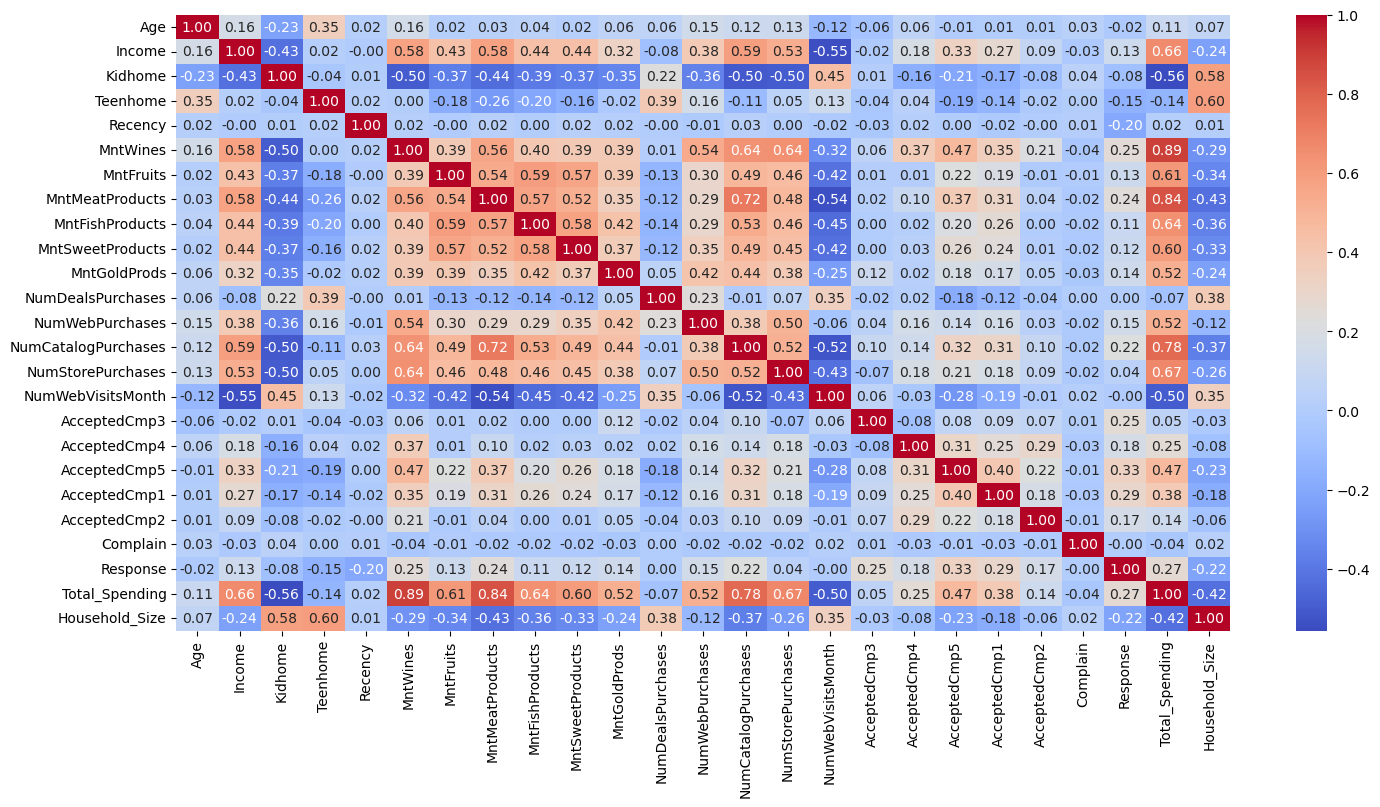

In [38]:
# seperate numerical columns
numeric_col = data.select_dtypes(exclude='object').drop('ID', axis=1).columns 
data_num = data[numeric_col]

plt.rcParams["figure.figsize"] = (17,8)
corr_matrix = data_num.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")